In [2]:
import pandas as pd
import os

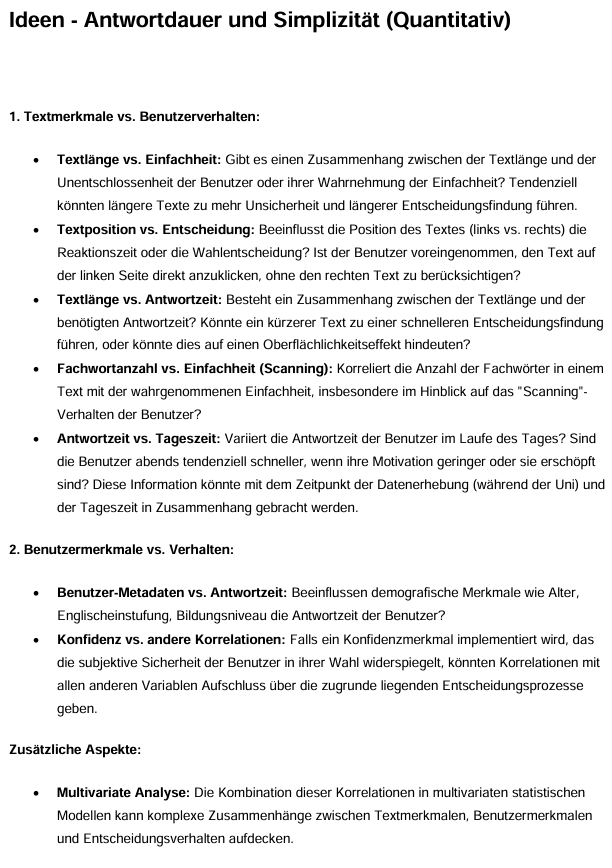

In [3]:
files = os.listdir("DIS22_ARTS_Project-main/export")

In [4]:
files

['aab-94.csv',
 'ArthMa-94.csv',
 'Casomoto-94.csv',
 'DisRating-94.csv',
 'english_level.csv',
 'ghost-94.csv',
 'IAA.csv',
 'Kaffeetrinker-94.csv',
 'Peter-94.csv',
 'Power-94.csv',
 'Rater1-94.csv',
 'Rater2-94.csv',
 'Rater3-94.csv',
 'Rater4-94.csv',
 'Rater5-94.csv',
 'Rater6-94.csv',
 'Scores_aab-94.csv',
 'Scores_ArthMa-94.csv',
 'Scores_Casomoto-94.csv',
 'Scores_DisRating-94.csv',
 'Scores_ghost-94.csv',
 'Scores_Kaffeetrinker-94.csv',
 'Scores_Peter-94.csv',
 'Scores_Power-94.csv',
 'Scores_Rater1-94.csv',
 'Scores_Rater2-94.csv',
 'Scores_Rater3-94.csv',
 'Scores_Rater4-94.csv',
 'Scores_Rater5-94.csv',
 'Scores_Rater6-94.csv',
 'Scores_vikoooy-94.csv',
 'Scores___Gold15.csv',
 'Scores___gpt-4-1106-preview_old.csv',
 'Scores___Links-94.csv',
 'Scores___Rechts-94.csv',
 'Texts.csv',
 'vikoooy-94.csv',
 'vikoooy-94.csvvalue_add',
 '__Gold15.csv',
 '__gpt-4-1106-preview_old.csv',
 '__Links-94.csv',
 '__Rechts-94.csv']

In [5]:
base = "DIS22_ARTS_Project-main/export/"
rater_dic = {}
for i in range(0,len(files)):
    if "Scores" not in files[i] and "-94" in files[i] and "_" not in files[i]:
        df = pd.read_csv(base+files[i])
        df["time_diff_seconds"] = 0
        timestamps = pd.to_datetime(df['time'], format='%H:%M:%S')
        for y in range(1,len(df)):
            df.loc[y-1, "time_diff_seconds"] = (timestamps[y] - timestamps[y-1]).total_seconds()
        rater_dic[files[i].split(".")[0]] = df

In [6]:
rater_dic["aab-94"]

,Unnamed: 0,candidates,winner,time,left,right,time_diff_seconds
0,0,"(57, 51)",57,12:20:02,57,51,12
1,1,"(45, 69)",45,12:20:14,45,69,10
2,2,"(29, 93)",93,12:20:24,29,93,21
3,3,"(1, 67)",1,12:20:45,1,67,14
4,4,"(20, 27)",27,12:20:59,20,27,18
...,...,...,...,...,...,...,...
371,371,"(10, 47)",10,14:09:43,10,47,5
372,372,"(67, 31)",67,14:09:48,67,31,20
373,373,"(61, 90)",90,14:10:08,61,90,13
374,374,"(49, 82)",82,14:10:21,49,82,6


In [50]:
rater_dic_median_time = {}
for key, value in rater_dic.items():
    rater_dic_median_time[key] =  value["time_diff_seconds"].median()

In [51]:
rater_dic_median_time

{'aab-94': 7.0,
 'ArthMa-94': 5.0,
 'Casomoto-94': 2.0,
 'DisRating-94': 8.0,
 'ghost-94': 8.0,
 'Kaffeetrinker-94': 7.0,
 'Peter-94': 9.0,
 'Power-94': 9.5,
 'Rater1-94': 13.0,
 'Rater2-94': 7.0,
 'Rater3-94': 8.0,
 'Rater4-94': 7.0,
 'Rater5-94': 26.0,
 'Rater6-94': 8.0,
 'vikoooy-94': 7.0}

In [52]:
rater_df = pd.DataFrame.from_dict(rater_dic_median_time, orient='index', columns=['median_time'])
rater_df.reset_index(inplace=True)
rater_df.rename(columns={'index': 'rater'}, inplace=True)

In [61]:
agrreement = pd.read_csv(base+"IAA.csv")

In [62]:
agrreement.rename(columns={'Unnamed: 0': 'rater'}, inplace=True)
merged_df = pd.merge(rater_df, agrreement, on='rater', how='outer')
merged_df = merged_df.dropna()
merged_df = merged_df.drop(columns=['Cohens Kappa', 'Rank correlation'])

In [66]:
merged_df

,rater,median_time,Agreement Percentage
0,aab-94,7.0,0.768617
1,ArthMa-94,5.0,0.765957
2,Casomoto-94,2.0,0.808511
3,DisRating-94,8.0,0.843085
4,ghost-94,8.0,0.795213
5,Kaffeetrinker-94,7.0,0.784574
6,Peter-94,9.0,0.773936
7,Power-94,9.5,0.686170
8,Rater1-94,13.0,0.885638
9,Rater2-94,7.0,0.808511


In [69]:
correlation = merged_df['median_time'].corr(merged_df['Agreement Percentage'])
correlation

-0.009485943438847644

### Result:
-0.0095 indicates a very weak negative linear relationship between the median time and the agreement percentage.

In practical terms, this means that there is almost no linear association between the two variables. The negative sign indicates a very slight tendency for the agreement percentage to decrease slightly as the median time increases, but this relationship is extremely weak.

Therefore, based on this correlation coefficient alone, we cannot conclude that there is any meaningful relationship between median time and agreement percentage.

In [ ]:
# CORRELATION ZU TAGESZEIT & TAG UND ANTWORTZEIT

# Zeit
- Zeit x Textlänge
- Zeit x Text Komplexität
- Zeit x Übereinstimmung

In [ ]:
# je öfter dasselbe vorkommt desto schneller man antwortet
# Textlänge vs Antwortzeit
# avg antwortzeit zu agreement rating
# englisch rating zu agreement